In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [47]:
news_df=pd.read_csv('C:\\Ankur\\Frankfurt\\Classes\\Company_Project\\Python File\\Git\\2\\nlp_for_analysing_news_signals\\2_picking_signals_from_news_content\\news_df_with_top4_signals.csv')
print(f"Length of raw dataframe = {len(news_df)}")
news_df.head(2)

Length of raw dataframe = 3168


,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,signal_2,signal_3,signal_4
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","tensor([ 8.2298e-03, -1.0426e-01, -1.6461e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Partnerships_cos
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\r\n\r\nBerenberg, Sebastian Bray","tensor([ 1.5170e-02, 7.4811e-02, -7.3396e-02,...",Financial_Partnerships_cos,Financial_Deals_cos,Capital_Markets_Stock_Analysis_cos,Technological_Deals_Collaborations_cos


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

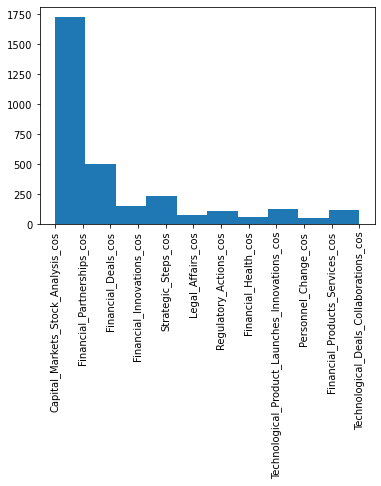

In [48]:
plt.hist(news_df['signal_1'])
plt.xticks(rotation=90)

In [49]:
%%capture
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [50]:
# our pre-defined dictionary of events/signals
event_descriptions = {
    "event": [
        "Financial_Products_Services",
        "Financial_Deals",
        "Financial_Partnerships",
        "Financial_Innovations",
        "Financial_Health",
        "Strategic_Steps",
        "Personnel_Change",
        "Technological_Product_Launches_Innovations",
        "Technological_Deals_Collaborations",
        "Regulatory_Actions",
        "Legal_Affairs",
        "Capital_Markets_Stock_Analysis"
    ],
    "description": [
        "News related to the introduction, withdrawal, or alterations in financial instruments, services, or products offered by a company. This includes launches, discontinuations, and changes in features.",
        "Reports covering financial transactions, such as the placement of new funds or assets in the capital market, as well as support for customer Initial Public Offerings (IPOs) or mergers and acquisitions.",
        "News highlighting collaborations, alliances, or partnerships entered into by a company for financial purposes. This can include joint ventures, strategic alliances, or long-term partnerships.",
        "News regarding the development and introduction of novel financial products or services, often accompanied by whitepapers or patents that showcase innovative approaches or technologies.",
        "Coverage related to the overall well-being of a company from a financial perspective. This encompasses aspects like bankruptcy, valuation changes, solvency issues, and other indicators of financial stability or distress.",
        "News outlining strategic decisions made by a company, such as initial public offerings (IPOs), mergers, acquisitions, expansions, fundraise activities, stock buybacks, and other significant corporate moves.",
        "Reports on changes in a company's workforce, including hirings, firings, the number of employees affected, mass recruitments, and any notable shifts in personnel.",
        "Information about the release of new technological products, services, or innovations. This category covers technological advancements, patents, and research papers hinting at potential tech developments.",
        "News highlighting partnerships, collaborations, or deals related to technology, including joint ventures, technology-sharing agreements, or collaborations for research and development.",
        "Reports on actions taken by or against a company by regulatory bodies. This includes compliance issues, regulatory investigations, and any changes in regulations affecting the company.",
        "News covering legal matters, including lawsuits, penalties, victories, sanctions, warnings, and other legal or compliance-related developments involving the company.",
        "Analyses and reports provided by companies, often banks, regarding stock performance, capital market trends, and insights into specific markets or assets."
    ]
}

events_df = pd.DataFrame(event_descriptions) # dataframe from dictionary
events_df['description_embeddings'] = ""

# re- creating embeddings of the descriptions of the signals
for index, row in events_df.iterrows():
  events_df.at[index, 'description_embeddings'] = model.encode(row['description'], convert_to_tensor=True)

events_df.head()

,event,description,description_embeddings
0,Financial_Products_Services,"News related to the introduction, withdrawal, ...","[tensor(0.0042), tensor(0.0167), tensor(-0.003..."
1,Financial_Deals,"Reports covering financial transactions, such ...","[tensor(0.0492), tensor(-0.0334), tensor(-0.05..."
2,Financial_Partnerships,"News highlighting collaborations, alliances, o...","[tensor(0.0351), tensor(-0.0552), tensor(-0.06..."
3,Financial_Innovations,News regarding the development and introductio...,"[tensor(-0.0363), tensor(-0.0188), tensor(-0.0..."
4,Financial_Health,Coverage related to the overall well-being of ...,"[tensor(0.0044), tensor(0.0922), tensor(0.0121..."


In [51]:
company_of_interest = "Berenberg Bank" # company for which we want to analyze the news
signal_of_interest = "Capital_Markets_Stock_Analysis"


company_all_news_df = news_df[news_df['companies_in_news'].astype(str).str.contains(company_of_interest, case=False)]
company_all_news_df = company_all_news_df.sort_values(by='news_date', ascending = False)
company_news_df = company_all_news_df[company_all_news_df['signal_1'] == signal_of_interest + '_cos'].drop(columns=['signal_2', 'signal_3', 'signal_4']) # filtering news with signal_of_interest as signal_1
# extracting dates from date-time-stamps
company_news_df['news_date_simplified'] = pd.to_datetime(company_news_df['news_date'].str[:10]) # extract first 10 characters and convert to datetime
company_news_df = company_news_df.reset_index(drop=True)
print(f"length of filtered dataframe = {len(company_news_df)}")

cols = ['id', 'news_date',	'news_date_simplified', 'news_title',	'news_content',	'companies_in_news',	'news_content_embeddings',	'signal_1']
company_news_df = company_news_df[cols] #re-arranging columns
company_news_df.head(5)

length of filtered dataframe = 462


,id,news_date,news_date_simplified,news_title,news_content,companies_in_news,news_content_embeddings,signal_1
0,defWorldReporestupdate2html,2023-10-30 09:27:47,2023-10-30,Talanx AG (OTCMKTS:TNXXF) Short Interest Updat...,Berenberg Bank has upgraded its rating on Tala...,"Berenberg Bank, Talanx, HSBC.","tensor([-6.2445e-02, -5.9690e-02, -4.7869e-02,...",Capital_Markets_Stock_Analysis_cos
1,defyHSBCStocweredbyhsbchtml,2023-10-28 16:40:01,2023-10-28,Reckitt Benckiser Group (OTCMKTS:RBGLY) Stock ...,Berenberg Bank has reduced its target price fo...,"Reckitt Benckiser Group, Berenberg Bank.","tensor([ 3.4826e-02, -4.2792e-03, -7.7424e-03,...",Capital_Markets_Stock_Analysis_cos
2,abcshadowPresmideast104342444,2023-10-26 19:28:46,2023-10-26,Europe's central bank is set to halt rate hike...,The European Central Bank's (ECB) message appe...,"Berenberg bank, European Central Bank.","tensor([ 2.8340e-02, 2.0919e-02, -3.0415e-02,...",Capital_Markets_Stock_Analysis_cos
3,fin1023Presoverweight915798,2023-10-21 16:04:27,2023-10-21,MTU Aero Engines Overweight von JP Morgan Chas...,JP Morgan Chase & Co. has announced its plan t...,"JP Morgan Chase & Co, Berenberg Bank, Joh. Ber...","tensor([-1.3338e-02, 6.3491e-02, -2.3519e-02,...",Capital_Markets_Stock_Analysis_cos
4,efiareersJobk252Cny252Cusa,2023-10-21 05:59:26,2023-10-21,Investment Banking Analyst job in New York at ...,"The article is not accessible, however, it men...","Berenberg Bank, eFinancialCareers","tensor([ 3.0946e-02, -8.2079e-02, -8.6097e-02,...",Capital_Markets_Stock_Analysis_cos


In [52]:
random_row = 7
print(type(company_news_df.news_content_embeddings[random_row])) # this outputs type as string

# since "news_content_embeddings" column should contain tensors, we change the string items back to tensors
for index, row in company_news_df.iterrows():
  company_news_df.at[index, 'news_content_embeddings'] = model.encode(row['news_content'], convert_to_tensor=True)

print(type(company_news_df.news_content_embeddings[random_row])) # now this should be type 'tensor'

<class 'str'>
<class 'torch.Tensor'>


In [53]:
# For Extracting numbers

In [54]:
# our pre-defined dictionary of events/signals
number_descriptions = {
    "event": [
        "Financial_Products_Services",
        "Financial_Deals",
        "Financial_Partnerships",
        "Financial_Innovations",
        "Financial_Health",
        "Strategic_Steps",
        "Personnel_Change",
        "Technological_Product_Launches_Innovations",
        "Technological_Deals_Collaborations",
        "Regulatory_Actions",
        "Legal_Affairs",
        "Capital_Markets_Stock_Analysis"
    ],
    "description": [
        "Extract the details of any financial amounts, such as investment figures or values, mentioned in news related to the introduction, withdrawal, or alterations in financial instruments, services, or products offered by a company.",
        "Identify and extract notable financial figures, such as fund placements, asset values, or transaction amounts, from reports covering financial transactions, including the placement of new funds, customer Initial Public Offerings (IPOs), or mergers and acquisitions.",
        "Retrieve relevant financial data, including monetary values or investment details, from news highlighting collaborations, alliances, or partnerships entered into by a company for financial purposes, such as joint ventures, strategic alliances, or long-term partnerships.",
        "Extract financial information, such as investment values or funding amounts, associated with the development and introduction of novel financial products or services. Include details from whitepapers or patents that showcase innovative approaches or technologies.",
        "Identify and extract financial indicators or figures related to the overall well-being of a company, encompassing aspects like bankruptcy, valuation changes, solvency issues, and other indicators of financial stability or distress.",
        "Retrieve financial data, including amounts involved or impacted, from news outlining strategic decisions made by a company. This can include details on initial public offerings (IPOs), mergers, acquisitions, expansions, fundraise activities, stock buybacks, and other significant corporate moves.",
        "Extract relevant financial figures from reports on changes in a company's workforce, including hirings, firings, mass recruitments, and any notable shifts in personnel, that have financial implications for the company.",
        "Identify and extract financial information associated with the release of new technological products, services, or innovations. This includes details on technological advancements, patents, and research papers hinting at potential tech developments.",
        "Retrieve financial details, such as investment values or collaboration amounts, from news highlighting partnerships, collaborations, or deals related to technology, including joint ventures, technology-sharing agreements, or collaborations for research and development.",
        "Extract financial implications and amounts involved from reports on actions taken by or against a company by regulatory bodies. This includes compliance issues, regulatory investigations, and any changes in regulations affecting the company.",
        "Identify and extract financial details, such as penalties, settlement amounts, or legal fees, from news covering legal matters, including lawsuits, victories, sanctions, warnings, and other legal or compliance-related developments involving the company.",
        "Retrieve financial insights and figures from analyses and reports provided by companies, often banks, regarding stock performance, capital market trends, and insights into specific markets or assets."
    ]
}

number_df = pd.DataFrame(number_descriptions) # dataframe from dictionary
number_df['number_embeddings'] = ""
number_df

# re- creating embeddings of the descriptions of the signals
for index, row in number_df.iterrows():
  number_df.at[index, 'number_embeddings'] = model.encode(row['description'], convert_to_tensor=True)

number_df.head()

,event,description,number_embeddings
0,Financial_Products_Services,"Extract the details of any financial amounts, ...","[tensor(0.0326), tensor(0.0969), tensor(-0.060..."
1,Financial_Deals,Identify and extract notable financial figures...,"[tensor(0.0840), tensor(-0.0034), tensor(-0.07..."
2,Financial_Partnerships,"Retrieve relevant financial data, including mo...","[tensor(0.0599), tensor(-0.0145), tensor(-0.09..."
3,Financial_Innovations,"Extract financial information, such as investm...","[tensor(0.0190), tensor(0.0606), tensor(-0.095..."
4,Financial_Health,Identify and extract financial indicators or f...,"[tensor(0.0512), tensor(0.0427), tensor(0.0072..."


In [55]:
# now we evaluate news features in order to 'rank' news items

# feature 1 --> length of news item
company_news_df['news_length'] = company_news_df['news_content'].apply(lambda x: len(x.split()))  # word count as length
# feature 2 --> relevance of news item
company_news_df['news_relevance'] = company_news_df['news_content_embeddings'].apply(lambda x: util.pytorch_cos_sim(x, events_df.loc[events_df['event'] == signal_of_interest, 'description_embeddings'].iloc[0]).item())  # relevance = cosine similarity between 'news embedding' and 'signal/event descriprion'
# feature 3 --> age of news item
company_news_df['news_age'] = (datetime.now() - company_news_df['news_date_simplified']).dt.days + 1 # evaluating age of news in days
# feature 4 --> digits contains in news item
company_news_df['digit_relevance'] = company_news_df['news_content_embeddings'].apply(lambda x: util.pytorch_cos_sim(x, number_df.loc[number_df['event'] == signal_of_interest, 'number_embeddings'].iloc[0]).item()) 
# filtering dataframe for latest 'n' days worth of news
n = 40
ndays_company_news_df = company_news_df[company_news_df['news_age']<=n]
print(len(ndays_company_news_df))
ndays_company_news_df.head()

6


,id,news_date,news_date_simplified,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,news_length,news_relevance,news_age,digit_relevance
0,defWorldReporestupdate2html,2023-10-30 09:27:47,2023-10-30,Talanx AG (OTCMKTS:TNXXF) Short Interest Updat...,Berenberg Bank has upgraded its rating on Tala...,"Berenberg Bank, Talanx, HSBC.","[tensor(-0.0624), tensor(-0.0597), tensor(-0.0...",Capital_Markets_Stock_Analysis_cos,57,0.347074,28,0.258019
1,defyHSBCStocweredbyhsbchtml,2023-10-28 16:40:01,2023-10-28,Reckitt Benckiser Group (OTCMKTS:RBGLY) Stock ...,Berenberg Bank has reduced its target price fo...,"Reckitt Benckiser Group, Berenberg Bank.","[tensor(0.0348), tensor(-0.0043), tensor(-0.00...",Capital_Markets_Stock_Analysis_cos,29,0.135116,30,0.063945
2,abcshadowPresmideast104342444,2023-10-26 19:28:46,2023-10-26,Europe's central bank is set to halt rate hike...,The European Central Bank's (ECB) message appe...,"Berenberg bank, European Central Bank.","[tensor(0.0283), tensor(0.0209), tensor(-0.030...",Capital_Markets_Stock_Analysis_cos,86,0.304180,32,0.238401
3,fin1023Presoverweight915798,2023-10-21 16:04:27,2023-10-21,MTU Aero Engines Overweight von JP Morgan Chas...,JP Morgan Chase & Co. has announced its plan t...,"JP Morgan Chase & Co, Berenberg Bank, Joh. Ber...","[tensor(-0.0133), tensor(0.0635), tensor(-0.02...",Capital_Markets_Stock_Analysis_cos,96,0.336457,37,0.278609
4,efiareersJobk252Cny252Cusa,2023-10-21 05:59:26,2023-10-21,Investment Banking Analyst job in New York at ...,"The article is not accessible, however, it men...","Berenberg Bank, eFinancialCareers","[tensor(0.0309), tensor(-0.0821), tensor(-0.08...",Capital_Markets_Stock_Analysis_cos,30,0.404161,37,0.365393


In [56]:
# now we combine features and 'rank' news items published in the latest n-days window:

# normalizing length for combining features
ndays_company_news_df['news_length_normalized'] = (ndays_company_news_df['news_length'] - ndays_company_news_df['news_length'].min()) / (ndays_company_news_df['news_length'].max() - ndays_company_news_df['news_length'].min())

# normalizing age for combining features; large age means less relevant news
ndays_company_news_df['news_age_normalized'] = 1 - ((ndays_company_news_df['news_age'] - ndays_company_news_df['news_age'].min()) / (ndays_company_news_df['news_age'].max() - ndays_company_news_df['news_age'].min()))

# combining features by assigning weights
weight_length = 0.15
weight_relevance = 0.6
weigth_digit = 0.15
weight_age = 1 - weight_length - weight_relevance - weith_digit

ndays_company_news_df['combined_feature'] = (weight_length * ndays_company_news_df['news_length_normalized']) + (weight_relevance * ndays_company_news_df['news_relevance']) + (weight_age * ndays_company_news_df['news_age_normalized']) + (weigth_digit * ndays_company_news_df['digit_relevance'])

# assign rankings based on the final combined feature
ranked_ndays_company_news_df = ndays_company_news_df.sort_values(by='combined_feature', ascending=False)

ranked_ndays_company_news_df[['id', 'news_date', 'news_title', 'news_content', 'companies_in_news', 'signal_1', 'news_length', 'news_relevance', 'digit_relevance', 'news_age', 'combined_feature']].head()

C:\Users\agarw\AppData\Local\Temp\ipykernel_12952\4012372697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndays_company_news_df['news_length_normalized'] = (ndays_company_news_df['news_length'] - ndays_company_news_df['news_length'].min()) / (ndays_company_news_df['news_length'].max() - ndays_company_news_df['news_length'].min())
C:\Users\agarw\AppData\Local\Temp\ipykernel_12952\4012372697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndays_company_news_df['news_age_normalized'] = 1 - ((ndays_c

,id,news_date,news_title,news_content,companies_in_news,signal_1,news_length,news_relevance,digit_relevance,news_age,combined_feature
0,defWorldReporestupdate2html,2023-10-30 09:27:47,Talanx AG (OTCMKTS:TNXXF) Short Interest Updat...,Berenberg Bank has upgraded its rating on Tala...,"Berenberg Bank, Talanx, HSBC.",Capital_Markets_Stock_Analysis_cos,57,0.347074,0.258019,28,0.409634
2,abcshadowPresmideast104342444,2023-10-26 19:28:46,Europe's central bank is set to halt rate hike...,The European Central Bank's (ECB) message appe...,"Berenberg bank, European Central Bank.",Capital_Markets_Stock_Analysis_cos,86,0.304180,0.238401,32,0.405880
3,fin1023Presoverweight915798,2023-10-21 16:04:27,MTU Aero Engines Overweight von JP Morgan Chas...,JP Morgan Chase & Co. has announced its plan t...,"JP Morgan Chase & Co, Berenberg Bank, Joh. Ber...",Capital_Markets_Stock_Analysis_cos,96,0.336457,0.278609,37,0.403666
4,efiareersJobk252Cny252Cusa,2023-10-21 05:59:26,Investment Banking Analyst job in New York at ...,"The article is not accessible, however, it men...","Berenberg Bank, eFinancialCareers",Capital_Markets_Stock_Analysis_cos,30,0.404161,0.365393,37,0.309544
5,dirrviewsStocrgbank4121130347,2023-10-20 23:57:29,Greggs plc 54.1% potential upside indicated by...,Berenberg Bank has set a target price of 3550 ...,"Greggs plc, Berenberg Bank.",Capital_Markets_Stock_Analysis_cos,82,0.246388,0.172470,38,0.292360


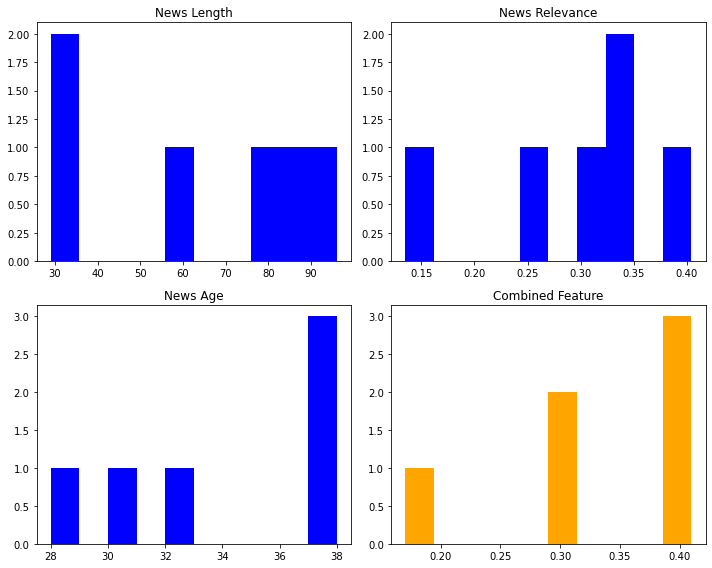

In [57]:
# plotting histograms in each subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].hist(ranked_ndays_company_news_df['news_length'], color='blue')
axes[0, 0].set_title('News Length')

axes[0, 1].hist(ranked_ndays_company_news_df['news_relevance'], color='blue')
axes[0, 1].set_title('News Relevance')

axes[1, 0].hist(ranked_ndays_company_news_df['news_age'], color='blue')
axes[1, 0].set_title('News Age')


axes[1, 1].hist(ranked_ndays_company_news_df['combined_feature'], color='orange')
axes[1, 1].set_title('Combined Feature')

plt.tight_layout()
plt.show()

In [58]:
ranked_ndays_company_news_df = ranked_ndays_company_news_df.reset_index(drop=True)

number = 10
for index, row in ranked_ndays_company_news_df.head(number).iterrows():
    news_item = row['news_content']
    rank_score = row['combined_feature']
    print(f"{rank_score}: {news_item}")
    print("*****")

0.40963359937739013: Berenberg Bank has upgraded its rating on Talanx shares from \"hold\" to \"buy,\" according to a recent research report. This positive rating suggests that the bank expects the stock to outperform the market and generate solid returns for investors. Conversely, HSBC has downgraded its rating on Talanx shares, possibly indicating a more cautious outlook for the stock.
*****
0.40587998235626005: The European Central Bank's (ECB) message appears to be clear, according to Holger Schmieding, the chief economist at Berenberg bank. In an analyst note, Schmieding highlighted that the ECB is not expected to make any significant changes to its policies at its upcoming meeting. The central bank is likely to maintain interest rates at their current record-low levels and continue its bond-buying program. Schmieding believes that the ECB is waiting for a clearer picture of the economic recovery before making any adjustments to its stimulus measures.
*****
0.4036656087636947: JP 